In [48]:
import pandas as pd
import os
import wget
import dataframe as df
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
url = 'http://unmtid-shinyapps.net/download/drug.target.interaction.tsv.gz'
filename = './data/drug.target.interaction.tsv.gz' # path to the file

if not os.path.exists(filename):
    filename = wget.download(url)

In [6]:
drug_target = pd.read_csv(filename, sep='\t', header=0)

# preview first few rows of the data
drug_target.head()

,DRUG_NAME,STRUCT_ID,TARGET_NAME,TARGET_CLASS,ACCESSION,GENE,SWISSPROT,ACT_VALUE,ACT_UNIT,ACT_TYPE,ACT_COMMENT,ACT_SOURCE,RELATION,MOA,MOA_SOURCE,ACT_SOURCE_URL,MOA_SOURCE_URL,ACTION_TYPE,TDL,ORGANISM
0,levobupivacaine,4,Sodium channel protein type 4 subunit alpha,Ion channel,P35499,SCN4A,SCN4A_HUMAN,NaN,NaN,NaN,NaN,WOMBAT-PK,NaN,1.0,CHEMBL,NaN,https://www.ebi.ac.uk/chembl/compound/inspect/...,BLOCKER,Tclin,Homo sapiens
1,levobupivacaine,4,Cytochrome P450 2D6,Enzyme,P10635,CYP2D6,CP2D6_HUMAN,6.706859,NaN,IC50,"DRUGMATRIX: CYP450, 2D6 enzyme inhibition (sub...",DRUG MATRIX,=,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
2,levobupivacaine,4,Potassium voltage-gated channel subfamily H me...,Ion channel,Q12809,KCNH2,KCNH2_HUMAN,4.890000,NaN,IC50,Inhibition of wild-type human ERG channel expr...,CHEMBL,=,NaN,NaN,https://www.ebi.ac.uk/chembl/compound/inspect/...,NaN,NaN,Tclin,Homo sapiens
3,levobupivacaine,4,Potassium voltage-gated channel subfamily D me...,Ion channel,Q9UK17,KCND3,KCND3_HUMAN,4.500000,NaN,IC50,NaN,WOMBAT-PK,=,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
4,levobupivacaine,4,Prostaglandin E2 receptor EP1 subtype,GPCR,P34995,PTGER1,PE2R1_HUMAN,NaN,NaN,NaN,NaN,WOMBAT-PK,NaN,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens


In [7]:
number_rows = drug_target.shape[0]
number_columns = drug_target.shape[1]
print("number of rows = ", number_rows)
print("number of columns = ", number_columns)

number of rows =  17390
number of columns =  20


In [8]:
drug_target_kinase = drug_target.loc[drug_target["TARGET_CLASS"] == "Kinase"]

In [9]:
drug_target_kinase.shape

(2885, 20)

In [10]:
drug_target_kinase

,DRUG_NAME,STRUCT_ID,TARGET_NAME,TARGET_CLASS,ACCESSION,GENE,SWISSPROT,ACT_VALUE,ACT_UNIT,ACT_TYPE,ACT_COMMENT,ACT_SOURCE,RELATION,MOA,MOA_SOURCE,ACT_SOURCE_URL,MOA_SOURCE_URL,ACTION_TYPE,TDL,ORGANISM
57,aceclofenac,43,Mitogen-activated protein kinase 1,Kinase,P28482,MAPK1,MK01_HUMAN,5.227165,NaN,IC50,"DRUGMATRIX: Protein Serine/Threonine Kinase, E...",DRUG MATRIX,=,NaN,NaN,NaN,NaN,NaN,Tchem,Homo sapiens
186,aciclovir,85,Thymidine kinase,Kinase,Q9QNF7,TK,KITH_HHV1,NaN,NaN,NaN,NaN,WOMBAT-PK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Human herpesvirus 1
187,aciclovir,85,Thymidine kinase,Kinase,P04407,TK,KITH_HHV23,NaN,NaN,NaN,NaN,WOMBAT-PK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Human herpesvirus 2 (strain 333)
188,aciclovir,85,Thymidine kinase,Kinase,P09250,NaN,KITH_VZVD,NaN,NaN,NaN,NaN,WOMBAT-PK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Varicella-zoster virus (strain Dumas)
196,adenine,89,"Phosphatidylinositol 4-kinase, PI4K",Kinase,P42356|Q8TCG2|Q9BTU6|Q9UBF8,PI4K2A|PI4K2B|PI4KA|PI4KB,P4K2A_HUMAN|P4K2B_HUMAN|PI4KA_HUMAN|PI4KB_HUMAN,4.070000,NaN,Ki,Binding affinity (Ki) against human phosphatid...,CHEMBL,=,NaN,NaN,https://www.ebi.ac.uk/chembl/compound/inspect/...,NaN,NaN,Tbio|Tbio|Tchem|Tchem,Homo sapiens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17385,tucatinib,5389,Receptor tyrosine-protein kinase erbB-4,Kinase,Q15303,ERBB4,ERBB4_HUMAN,6.500000,NaN,IC50,NaN,SCIENTIFIC LITERATURE,=,NaN,NaN,http://www.ncbi.nlm.nih.gov/pubmed/32241871,NaN,INHIBITOR,Tclin,Homo sapiens
17386,pemigatinib,5390,Fibroblast growth factor receptor 1,Kinase,P11362,FGFR1,FGFR1_HUMAN,9.400000,NaN,IC50,NaN,SCIENTIFIC LITERATURE,=,1.0,DRUG LABEL,http://www.ncbi.nlm.nih.gov/pubmed/32315352,https://www.accessdata.fda.gov/drugsatfda_docs...,INHIBITOR,Tclin,Homo sapiens
17387,pemigatinib,5390,Fibroblast growth factor receptor 2,Kinase,P21802,FGFR2,FGFR2_HUMAN,9.300000,NaN,IC50,NaN,SCIENTIFIC LITERATURE,=,1.0,DRUG LABEL,http://www.ncbi.nlm.nih.gov/pubmed/32315352,https://www.accessdata.fda.gov/drugsatfda_docs...,INHIBITOR,Tclin,Homo sapiens
17388,pemigatinib,5390,Fibroblast growth factor receptor 3,Kinase,P22607,FGFR3,FGFR3_HUMAN,9.000000,NaN,IC50,NaN,SCIENTIFIC LITERATURE,=,1.0,DRUG LABEL,http://www.ncbi.nlm.nih.gov/pubmed/32315352,https://www.accessdata.fda.gov/drugsatfda_docs...,INHIBITOR,Tclin,Homo sapiens


In [11]:
number_drugs = len(drug_target_kinase.DRUG_NAME.unique())
number_genes = len(drug_target_kinase.GENE.unique())
print("number of drugs: ", number_drugs)
print("number of genes: ", number_genes)

number of drugs:  230
number of genes:  443


In [29]:
drug = drug_target_kinase["DRUG_NAME"]
gene = drug_target_kinase["GENE"]
drug_gene = pd.DataFrame(list(zip(drug, gene)),
                       columns =['DRUG_NAME', 'Gene'])

In [30]:
drug_gene_unq = drug_gene.drop_duplicates()
drug_gene_unq = drug_gene_unq.dropna()

In [31]:
drug_gene_unq.to_csv('./data/drug_gene.csv', sep='\t', header=True, index=False)

In [32]:
drug_gene_unq

,DRUG_NAME,Gene
0,aceclofenac,MAPK1
1,aciclovir,TK
4,adenine,PI4K2A|PI4K2B|PI4KA|PI4KB
5,adenosine,AK
6,adenosine,ADK
...,...,...
2880,tucatinib,ERBB4
2881,pemigatinib,FGFR1
2882,pemigatinib,FGFR2
2883,pemigatinib,FGFR3


In [35]:
G = nx.read_edgelist('./data/drug_gene.csv', nodetype=str, delimiter='\t')

In [39]:
print("number of nodes of the graph = ", G.number_of_nodes())
print("number of edges of the graph =", G.number_of_edges())

number of nodes of the graph =  672
number of edges of the graph = 2877


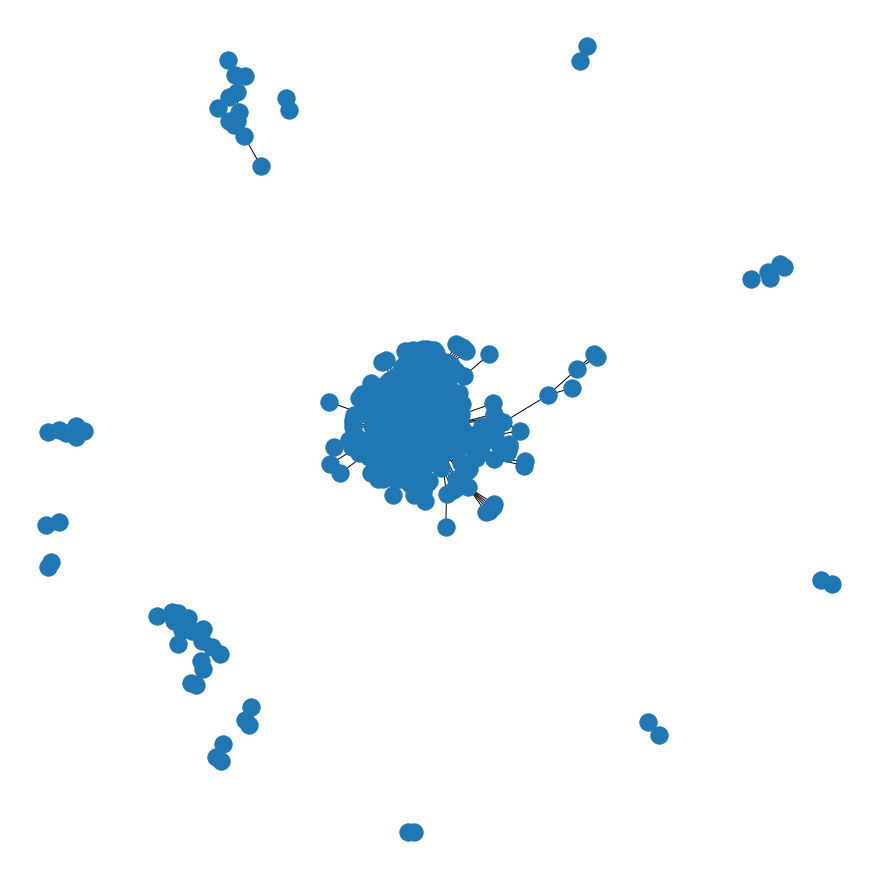

In [50]:
plt.figure(7,figsize=(12,12)) 
nx.draw(G)
plt.show()